<a href="https://colab.research.google.com/github/Elangoraj/Social-network-analysis/blob/main/Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd = '/content/drive/MyDrive/Networks/ia-enron.csv'

# Analyze a Network

**Load network**

In [3]:
import networkx as nx #---> Library for network analysis
import matplotlib.pyplot as plt #---> Library for creating plots
import collections #---> Library for operating with dictionaries
import random #---> Library for generating random numbers/distributions
import numpy as np #---> Library for efficiently operating with arrays/matrices/vectors
from pylab import rcParams
import matplotlib.colors as mcolors

In [4]:
fh = open(pwd, "rb")
Gx = nx.read_edgelist(fh)
fh.close()

**Adjacency Matrix**

In [5]:
print(nx.adjacency_matrix(Gx))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 8)	1
  (0, 10)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 27)	1
  (0, 31)	1
  (0, 39)	1
  (0, 43)	1
  (0, 50)	1
  (0, 51)	1
  (0, 54)	1
  (0, 57)	1
  (0, 60)	1
  (0, 61)	1
  :	:
  (146, 26)	1
  (146, 30)	1
  (146, 39)	1
  (146, 40)	1
  (146, 41)	1
  (146, 67)	1
  (146, 71)	1
  (146, 72)	1
  (147, 8)	1
  (147, 9)	1
  (147, 12)	1
  (147, 20)	1
  (147, 22)	1
  (147, 45)	1
  (147, 54)	1
  (147, 62)	1
  (147, 69)	1
  (147, 80)	1
  (147, 143)	1
  (147, 144)	1
  (148, 97)	1
  (149, 54)	1
  (149, 97)	1
  (149, 111)	1
  (149, 119)	1


[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0, 0.5, 'node idx')

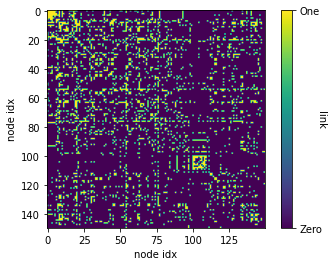

In [6]:
print(nx.to_numpy_matrix(Gx)) #--> visualize the entire adjacency matrix
plt.imshow(nx.to_numpy_matrix(Gx)) #--> This function create a heatmaps from 2-dimensional numpy arrays.
cbar = plt.colorbar() #--> set the colorbar of the heatmap
cbar.set_ticks([0,1]) #--> set the range of the color bar
cbar.ax.set_yticklabels(['Zero','One'],) #--> set the label of the number to display in the color bar

cbar.set_label('link', rotation=270) #--> set the label of the color bar and rotate it
plt.xlabel('node idx') #--> set the label of the x axis
plt.ylabel('node idx') #--> set the label of the y axis

**Degree distribution**

Degree sequence [76, 75, 66, 65, 62, 46, 45, 45, 41, 39, 39, 38, 36, 36, 34, 34, 34, 33, 32, 32, 32, 31, 31, 31, 31, 31, 31, 30, 30, 29, 29, 29, 28, 28, 27, 27, 27, 27, 26, 26, 26, 26, 25, 25, 25, 25, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 6, 5, 4, 4, 4, 3, 1]
Degree frequencies Counter({12: 11, 18: 10, 23: 9, 20: 8, 17: 7, 31: 6, 9: 6, 19: 5, 16: 5, 15: 5, 14: 5, 11: 5, 27: 4, 26: 4, 25: 4, 24: 4, 13: 4, 10: 4, 8: 4, 34: 3, 32: 3, 29: 3, 21: 3, 4: 3, 45: 2, 39: 2, 36: 2, 30: 2, 28: 2, 22: 2, 76: 1, 75: 1, 66: 1, 65: 1, 62: 1, 46: 1, 41: 1, 38: 1, 33: 1, 6: 1, 5: 1, 3: 1, 1: 1})


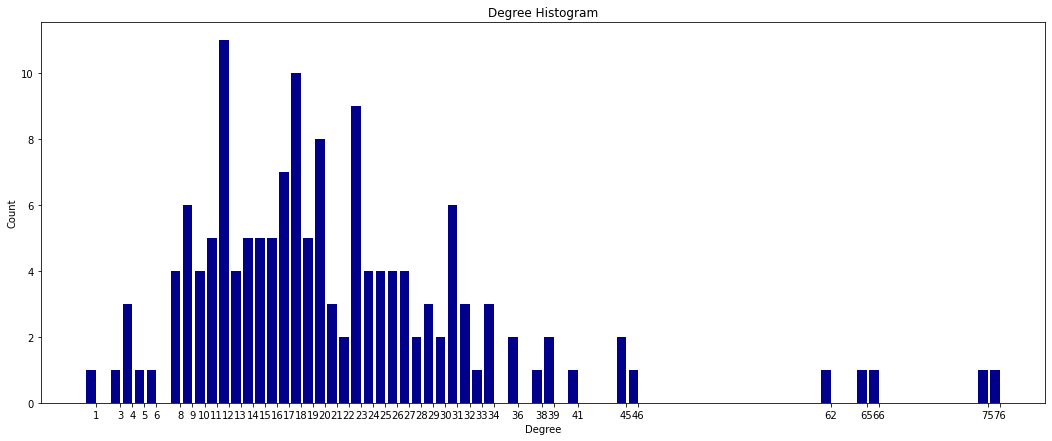

In [7]:
degree_sequence = sorted([d for n, d in Gx.degree()], reverse=True)  #<-- Save the degree of each node 
                                                                    #and order the list from highest to lowest
print("Degree sequence", degree_sequence)

degreeCount = collections.Counter(degree_sequence) #<-- Count the frequency (number of times) of each degree
print("Degree frequencies", degreeCount)

deg, cnt = zip(*degreeCount.items()) #<-- Function that create lists of iterables, 
                                     #one for the degrees and the other one for the frquencies

rcParams['figure.figsize'] = 18, 7 #<-- Set the plot size
fig, ax = plt.subplots() #<-- Create the subplots

plt.bar(deg, cnt, width=0.80, color='darkblue') #<-- Plot a bar plot with the degrees and their frequencies

#Set plot attributes as title, x and y labels, and ticks with frequencies larger than zero
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

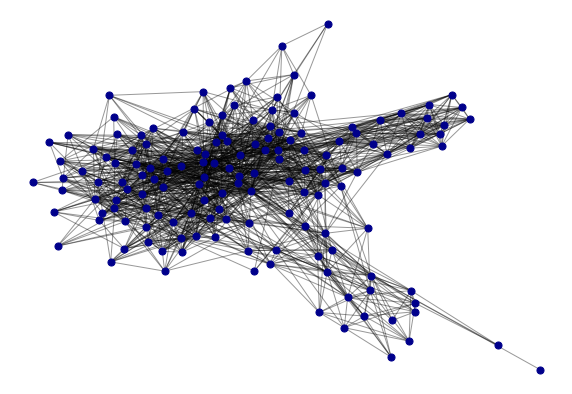

In [8]:
#Draw the network inside the barplot
# plt.axes([0.4, 0.4, 0.5, 0.5])

plt.figure(figsize=(10,7))
#Select the largest connected component of the network:
Gcc = Gx.subgraph(sorted(nx.connected_components(Gx), key=len, reverse=True)[0])

pos = nx.spring_layout(Gx) #<-- Set the layout of the network
plt.axis('off') #<-- Remove the axis of the network plot
nx.draw_networkx_nodes(Gx, pos, node_color= 'darkblue',node_size=50) #<-- Plot the nodes
nx.draw_networkx_edges(Gx, pos, alpha=0.4) #<-- Plot the edges
plt.show()

**Kolomoropv-Smirnov test**

In [9]:
dc = list(degreeCount.values())

In [10]:
from scipy.stats import lognorm, kstest

sigma, loc, scale = lognorm.fit(dc, floc=0)

mu = np.log(scale)

print("mu    = %9.5f" % mu)
print("sigma = %9.5f" % sigma)

stat, p = kstest(dc, 'lognorm', args=(sigma, 0, scale))
print("KS Test:")
print("stat    = %9.5f" % stat)
print("p-value = %9.5f" % p)

mu    =   0.97465
sigma =   0.76074
KS Test:
stat    =   0.20226
p-value =   0.05103


**Assortative or Disassortative**

In [11]:
nx.degree_assortativity_coefficient(Gx)

-0.04538787508087504

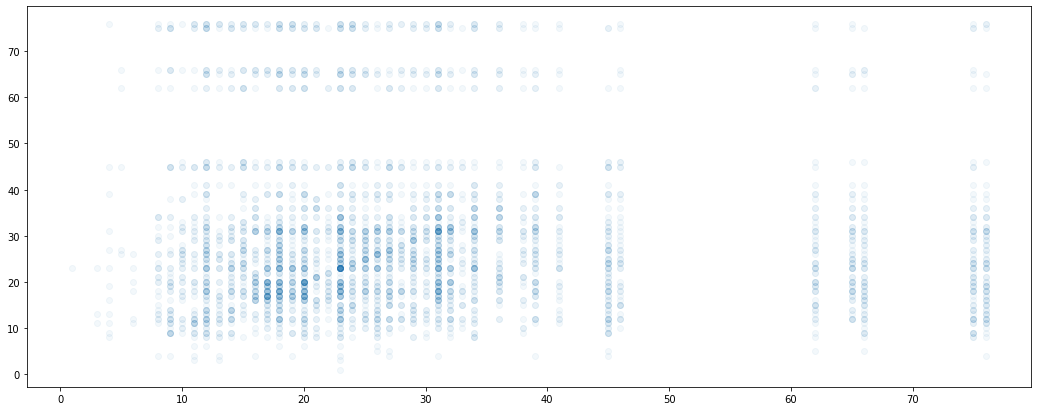

In [12]:
x = []
y = []

for i,j in Gx.edges():
  x.append(Gx.degree(i))
  y.append(Gx.degree(j))
  x.append(Gx.degree(j))
  y.append(Gx.degree(i))

plt.plot(x,y,'o',alpha=0.05)

**Fitting**

# **Centrality and Community Detection**

# Centralities

**Degree centralities:** Degree centrality defined as measurement of the number of connections owned by a node. The higher the degree, the more central the node is. Depends on the direction of the network two seperate measures of degree centrality are defined, indegree and outdegree. Count of incoming ties is the indegree and count of outgoing ties is the outdegree.

Example: Finding popular person within the class in twitter, in medical science to find degree of protein, etc.

**Eigenvector centrality:** It is measures a node’s importance while giving consideration to the importance of its neighbors. Here a node with few connections could have high eigenvector centrality if those few connections were to very well-connected nodes.

Example: Finding Influential person in the country, key author in reseach, impactful people on social media, etc.

**Difference between Degree and Eigenvector centrality:** Degree centrality awards one centrality point for every link to the node. But in eigenvector centrality a node is important if it is linked to by another important nodes. Degree centrality gives the number of relationship degree conected to the node whereas enigenvector gives the influential node in the network. In Eigenvector centrality a node receiving many links does not necessarily have a high eigenvector centrality and a node with high eigenvector centrality is not necessarily highly linked which is opposite way of degree centrality. 

**When to apply:** Usually degree centrality is used when finding highly connected, popular individual, node which can quickly connect to wider network and one which holds most information in the network. Eigenvector is used to understand human social network and understanding networks like malware propogation.  

**Closeness centrality**

In [13]:
import scipy.sparse
import scipy.sparse.csgraph

adj_mat = nx.adjacency_matrix(Gx).tolil()
D = scipy.sparse.csgraph.floyd_warshall(adj_mat, directed=False, unweighted=False)
print(D[1])

[1. 0. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 3. 2. 2. 2. 2. 1. 2. 3. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 3. 2. 2. 2.
 1. 2. 2. 3. 2. 1. 3. 2. 3. 2. 2. 3. 2. 3. 3. 2. 3. 2. 2. 2. 2. 1. 2. 2.
 3. 2. 2. 2. 2. 3. 3. 3. 2. 2. 2. 2. 3. 2. 3. 2. 2. 3. 2. 2. 3. 2. 2. 2.
 2. 2. 2. 3. 2. 3. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 3. 1. 2. 2. 1. 2. 2. 2.
 2. 2. 2. 2. 3. 2.]


In [14]:
def closeness_Centrality(mat):
  out = {}
  # adj_mat = nx.to_numpy_matrix(graph)
  n = len(D)
  for i in range(n):
    if np.sum(mat[i])>0:
      # out.append(round((n-1)/(np.sum(mat[i])),2))
      op = round((n-1)/(np.sum(mat[i])),2)
      out[i] = op
  return out

In [15]:
closeness_cen = closeness_Centrality(D)
closeness_cen[10]

0.53

In [16]:
cl_ce = nx.closeness_centrality(Gx)
cl_ce['11']

0.4950166112956811

**Comparison Centralities**

In [17]:
eg_ce = nx.eigenvector_centrality(Gx)
eg_ce['1']

0.05046824889190721

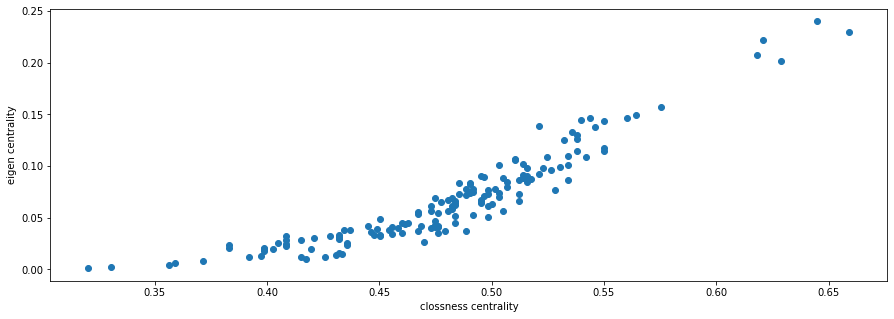

In [18]:
plt.figure(figsize=(15,5))
# plt.scatter(eg_ce.keys(),eg_ce.values())
plt.scatter(cl_ce.values(),eg_ce.values())
plt.xlabel('clossness centrality')
plt.ylabel('eigen centrality')
plt.show()

In [19]:
from scipy.stats import pearsonr
pearsonr(list(cl_ce.values()),list(eg_ce.values()))[0]

0.9250810688678448

**Centrality measure**

In [20]:
import operator
max(cl_ce.items(), key=operator.itemgetter(1)),max(eg_ce.items(), key=operator.itemgetter(1))

(('150', 0.6592920353982301), ('122', 0.23999231568820278))

Influencer

In [21]:
def draw(G, pos, measures, measure_name):
    '''This function draw a network based on a specific metric in the color and a specified layout
    
    Attributes:
    G: The networkx object
    pos: x and y coordinates of each node
    measures: dict with the node id as key and measure of centrality as value
    measure_name: string variable with the name of the plotted network '''
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=400, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys())) #<-- Set the node attributes to be plotted,
                                                                   # with the network, the nodes position, 
                                                                   # the color map for the measure that comes 
                                                                   # in numbers ranging in the color map
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1)) #<-- Seeting the color map of the nodes in a 
                                                                   #symmetric logaritmic normalized scale
    
    labels = nx.draw_networkx_labels(G, pos, font_color='white') #<-- Set the node labels
    edges = nx.draw_networkx_edges(G, pos) #<-- Set the edges pisitions

    plt.title(measure_name) #<-- Set the title of the plot
    cbar = plt.colorbar(nodes) #--> set the range of the color bar

    cbar.set_label('Weight', rotation=270) #--> Set the label of the color bar and rotate it
    
    plt.axis('off') #<-- Remove the axis of the network plot
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.


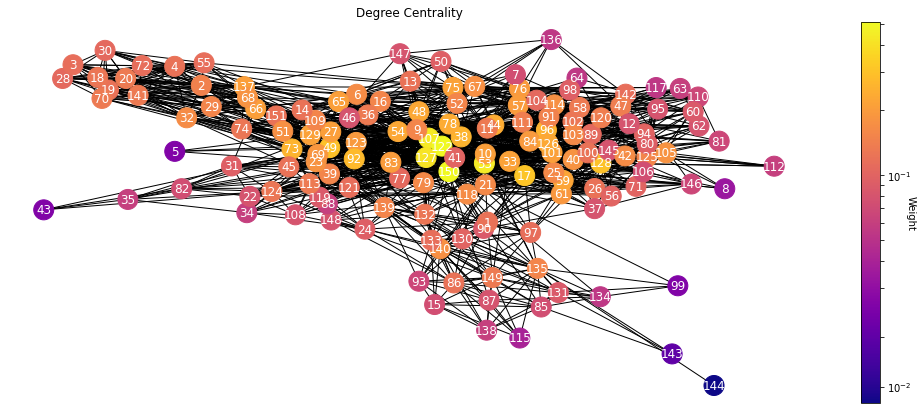

In [22]:
pos = nx.spring_layout(Gx)
draw(Gx, pos,nx.degree_centrality(Gx),'Degree Centrality' )

In [24]:
# def Draw_ego_network(G, pos, node_id, max_dist):


In [ ]:
draw(DiG, dpos, nx.katz_centrality(DiG, alpha=0.1, beta=1.0), 'DiGraph Katz Centrality')